* distribution of similarity scores
* pull out covid specific narratives with keyword based approach and map to historical narratives
* subtopics of top tweets

https://www.machinelearningplus.com/nlp/cosine-similarity/#2whatiscosinesimilarityandwhyisitadvantageous

In [1]:
import matplotlib.pyplot as plt
import palettable
from palettable.wesanderson import Aquatic1_5, Moonrise1_5, Mendl_4
import random
import numpy as np
import pandas as pd
from numpy import arange

In [2]:
import pickle
infile = open('glove_averages','rb')
glove_tweets2 = pickle.load(infile)
infile.close()

In [3]:
infile = open('top_yellow_peril','rb')
top_yellow_peril = pickle.load(infile)
infile.close()

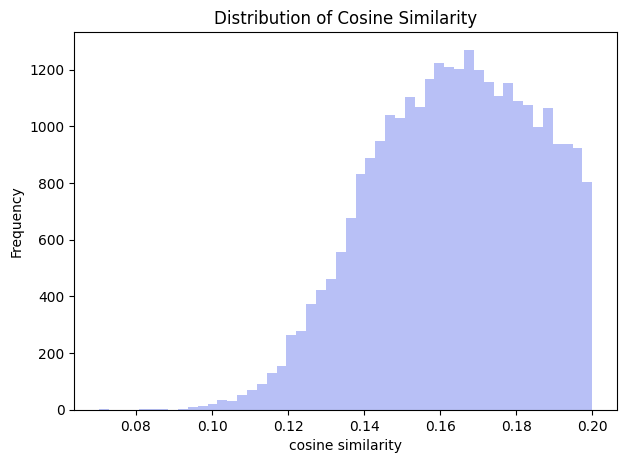

In [4]:
colors = np.array(Mendl_4.mpl_colors)
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
plt.hist(top_yellow_peril.cosine, bins = 50 , color = colors[1])
plt.gca().set(title='Distribution of Cosine Similarity', ylabel='Frequency', xlabel = 'cosine similarity');

In [5]:
infile = open('top_counterhate_mm','rb')
top_counterhate_mm = pickle.load(infile)
infile.close()

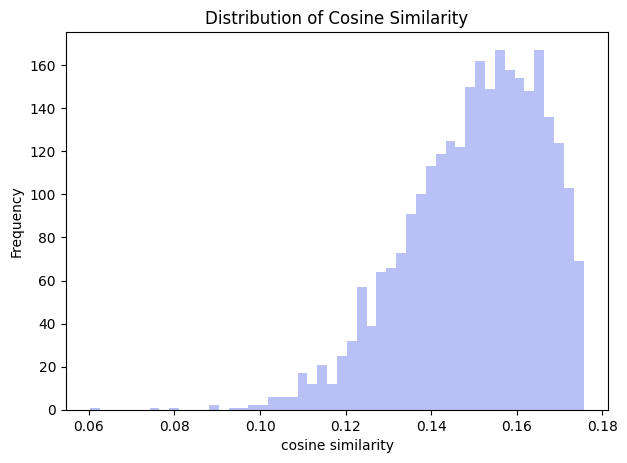

In [6]:
colors = np.array(Mendl_4.mpl_colors)
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
plt.hist(top_counterhate_mm.cosine, bins = 50 , color = colors[1])
plt.gca().set(title='Distribution of Cosine Similarity', ylabel='Frequency', xlabel = 'cosine similarity');

In [7]:
infile = open('top_peril_hate','rb')
top_peril_hate = pickle.load(infile)
infile.close()

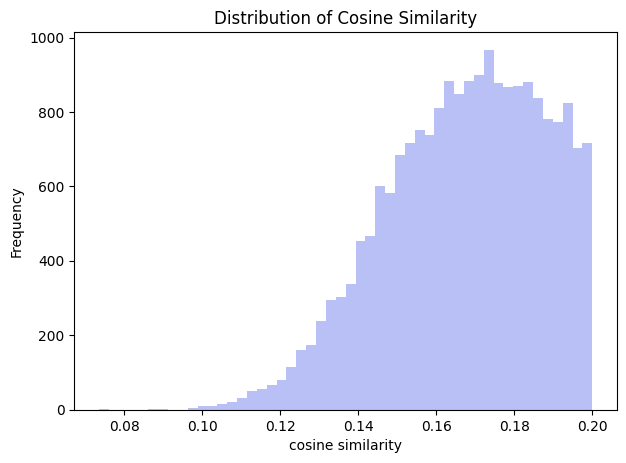

In [8]:
colors = np.array(Mendl_4.mpl_colors)
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
plt.hist(top_peril_hate.cosine, bins = 50 , color = colors[1])
plt.gca().set(title='Distribution of Cosine Similarity', ylabel='Frequency', xlabel = 'cosine similarity');

In [9]:
bioweapon_keywords = ['bioweapon', 'weapon', 'biology', 'lab', 'military', 'ccp', 'virologist', 'engineered', 'modified',
                      'scientist', 'government', 'xijinping', 'gain', 'function', 'escape', 'yan']
espionage_keywords = ['canada', 'research', 'stole', 'steal', 'lab', 'couple', 'laboratory', 'shipment', 'wuhan']
bat_keywords = ['bat', 'woman', 'eat', 'soup', 'contaminate']

In [10]:
import re
import emoji
import nltk
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maggiewu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maggiewu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
file_path = "hydrated.csv"
colnames = ['tweet_id', 'text', 'num_likes', 'date', 'author']
hydrated_data = pd.read_csv(file_path, names = colnames)
og_data = pd.read_csv("all_tweet_ids.csv")

labels = (og_data.loc[(og_data.Label == 'Hate') | (og_data.Label == 'Counterhate')]\
                     .rename(columns = {"Tweet ID" : "tweet_id"})
             )

#join label information to hydrated data
hydrated_data1 = pd.merge(hydrated_data, labels, how = 'left', on = 'tweet_id')

In [12]:
#stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

def cleaner(x):
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub("@[A-Za-z0-9]+",'', x)
    x = x.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    cleaned = emoji.get_emoji_regexp().sub("", x)
    
    #tokenize
    tw_tokenizer = TweetTokenizer()
    tokens = tw_tokenizer.tokenize(cleaned)
    normalized_tokens = [x.lower() for x in tokens]
    
    #remove some extra punctuation
    extra_punctuation = ['…','...', '. . .', '’','“']
    normalized_tokens = list(filter(lambda token: token not in string.punctuation, normalized_tokens))
    tweets_clean = []
    for word in normalized_tokens: # Go through every word in your tokens list
        if (word not in stopwords_list and  # remove stopwords
            word not in extra_punctuation):  # remove punctuation
            tweets_clean.append(word)
            
    token_dict=FreqDist(tweets_clean)

    return token_dict

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maggiewu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_corpus = hydrated_data1.apply(lambda x: cleaner(x['text']), axis=1)
corpus_dict = pd.concat([hydrated_data1['tweet_id'], clean_corpus], axis=1)
#corpus_dict = temp.set_index('tweet_id').to_dict()[0]

In [14]:
def counter(x):
    total = 0
    for key, value in x.items():
        if key in bioweapon_keywords:
            total = total + value
        else:
            continue
    return total

temp = corpus_dict.set_index('tweet_id').to_dict()[0]
corpus_dict['count'] = corpus_dict.apply(lambda x: counter(x[0]), axis = 1)
temp2 = corpus_dict[corpus_dict['count'] >= 5]
bioweapon_tweets = (pd.merge(temp2, hydrated_data1, how = 'left', on = 'tweet_id')
                      .sort_values('count', ascending = False)
                   )
pd.set_option("display.max_colwidth", None)
bioweapon_tweets.head(13)

,tweet_id,0,count,text,num_likes,date,author,Label
10,1237728204619517953,"{'ccp': 5, 'virus': 1, 'sir': 1, 'wuhanvirus': 3, 'pandemicbyccp': 2, 'blame': 4, 'china': 4, 'government': 4}",9,@OzraeliAvi This is CCP Virus. Sir. \n#Wuhanvirus\n#PandemicbyCCP \n#Wuhanvirus\n#PandemicbyCCP\n#Wuhanvirus\nI blame CCP and China government.\nI blame CCP and China government.\nI blame CCP and China government.\nI blame CCP and China government.,3,2020-03-11 13:12:54,hiro94655,Hate
1,1234084290394087425,"{'arrested': 1, 'ccp': 4, 'police': 1, 'disappeared': 1, 'shared': 1, 'viedos': 1, 'outside': 1, 'wuhan': 4, 'lab': 4, 'control': 1, 'msg': 1, 'covid': 1, '2019': 1, 'france': 1, 'helped': 1, 'build': 1, 'built': 1, 'xiangguo': 1, 'qiu': 1, 'stole': 1, 'virus': 1, 'canada': 1, 'world': 1, 'must': 1, 'ask': 1, 'details': 1, 'pls': 1}",8,"He was arrested by CCP police &amp; disappeared. \nHe has shared viedos about outside of Wuhan lab.\nCCP control msg of #COVID_2019.\nFrance helped CCP build Wuhan lab, but CCP built more. Xiangguo Qiu stole virus from Canada to Wuhan lab.\nThe world must ask details of Wuhan lab. Pls. https://t.co/63qGN0eKgl",0,2020-03-01 11:53:17,Miruku43780816,Hate
6,1241136439443652608,"{'coronavirus': 1, 'made': 1, 'wuhan': 1, 'f4': 1, 'lab': 1, 'ccp': 4, 'used': 1, 'bioweapon': 1, 'killed': 1, 'tens': 1, 'thousands': 1, 'people': 1, 'china': 1, 'ccpvirus': 1, 'threatening': 1, 'whole': 1, 'world': 2, 'nobody': 1, 'safe': 1, 'exists': 1, 'inty': 1, 'think': 1, 'get': 1, 'benefits': 1}",6,"@IntyMedia #coronavirus is made in Wuhan F4 lab by CCP, It is used as #BioWeapon by CCP, and killed tens of thousands of people in China. Now the #CCPVirus are threatening to the whole world. \nNobody in the world is safe when CCP exists. \n\nInty, you think you can get benefits from CCP?",0,2020-03-20 22:56:01,Mindyzhang10,Hate
0,1247548159141658624,"{'please': 1, 'stop': 1, 'using': 1, 'racism': 1, 'defend': 1, 'ccp': 4, 'information': 1, 'war': 1, 'denying': 1, 'responsibility': 2, 'ccpvirus': 1, 'phoenixtv': 2, 'media': 1, 'part': 1, 'propaganda': 1, 'system': 1, 'trying': 1, 'help': 1, 'escape': 1, 'hongkonger': 1, 'watch': 1}",5,"@SolomonYue @AmbCuiTiankai @AsiaSociety Please stop using Racism to defend for #CCP! \n#CCP is having an information war and denying their responsibility of #CCPVirus now. #PhoenixTV, a #CCP media and part of the propaganda system, is trying to help #CCP escape from their responsibility. No Hongkonger watch #PhoenixTV.",0,2020-04-07 15:33:54,LordCinnamore,Hate
2,1241358520387158016,"{'called': 1, 'ccp': 5, 'virus': 1, '≠': 2, 'chinese': 2, 'china': 1, '！': 1, 'people': 1, 'imprisoned': 1, 'choose': 1, 'see': 1, 'hear': 1, 'know': 1, 'little': 1, 'real': 1, 'world': 1, 'truman': 1, 'brainwashed': 1, 'victims': 1, 'dictatorship': 1}",5,@SpencerFernando It should be called CCP virus!CCP ≠Chinese ≠China！\nChinese people are imprisoned by CCP! CCP choose what they see and hear! They know as little about the real world as Truman does! They were brainwashed by CCP! They are victims of a dictatorship!,0,2020-03-21 13:38:29,Zhangli14896047,Hate
3,1241902826533478400,"{'please': 1, 'call': 2, 'chinese': 4, 'virus': 3, 'ccp': 5, 'created': 1, 'laboratory': 1, 'released': 1, 'people': 3, 'whole': 1, 'world': 1, 'victims': 1, 'hate': 1, 'can't': 2, 'vote': 1, 'china': 2, 'represent': 1}",5,"@realDonaldTrump @RandPaul Please not call ""Chinese virus"". Call it ""CCP Virus"", because CCP created the virus in the laboratory and released it. Chinese people and the whole world are the victims of CCP. We hate CCP. Chinese people can't vote in China, so CCP can't represent China or Chinese people.",0,2020-03-23 01:41:21,jtc1246,Hate
4,1243362413329571840,"{'many': 1, 'people': 1, 'think': 1, 'ccp': 5, 'china': 2, 'created': 1, 'virus': 1, 'covid': 2, '19': 2, 'cdc': 1, 'officials': 1, 'allowed': 1, 'wuhan': 1, 'study': 1, 'tests': 1, 'done': 1, 'doctors': 2, 'started': 1, 'term': 1, 'paid': 1, 'mostly': 1, 'testing': 1, '

In [15]:
def counter(x):
    total = 0
    for key, value in x.items():
        if key in espionage_keywords:
            total = total + value
        else:
            continue
    return total

temp = corpus_dict.set_index('tweet_id').to_dict()[0]
corpus_dict['count'] = corpus_dict.apply(lambda x: counter(x[0]), axis = 1)
temp2 = corpus_dict[corpus_dict['count'] >= 5]

espionage_tweets = (pd.merge(temp2, hydrated_data1, how = 'left', on = 'tweet_id')
                      .sort_values('count', ascending = False)
                   )
pd.set_option("display.max_colwidth", None)
espionage_tweets.head(25)

,tweet_id,0,count,text,num_likes,date,author,Label
2,1234084290394087425,"{'arrested': 1, 'ccp': 4, 'police': 1, 'disappeared': 1, 'shared': 1, 'viedos': 1, 'outside': 1, 'wuhan': 4, 'lab': 4, 'control': 1, 'msg': 1, 'covid': 1, '2019': 1, 'france': 1, 'helped': 1, 'build': 1, 'built': 1, 'xiangguo': 1, 'qiu': 1, 'stole': 1, 'virus': 1, 'canada': 1, 'world': 1, 'must': 1, 'ask': 1, 'details': 1, 'pls': 1}",10,"He was arrested by CCP police &amp; disappeared. \nHe has shared viedos about outside of Wuhan lab.\nCCP control msg of #COVID_2019.\nFrance helped CCP build Wuhan lab, but CCP built more. Xiangguo Qiu stole virus from Canada to Wuhan lab.\nThe world must ask details of Wuhan lab. Pls. https://t.co/63qGN0eKgl",0,2020-03-01 11:53:17,Miruku43780816,Hate
15,1235251419772575746,"{'research': 1, 'virus': 1, 'china': 2, 'allegedly': 1, 'stole': 1, 'canadian': 1, 'lab': 4, 'leaked': 1, 'wuhan': 1, 'bsl': 2, '4': 2, 'french': 1, 'began': 1, 'build': 1, 'incompetent': 1, 'thugs': 1, 'decided': 1, 'chinese': 1, 'firm': 1, 'complete': 1, 'maybe': 1, 'infected': 1, 'animal': 1, 'sold': 1, 'done': 1}",7,"@HawleyMO The research virus China allegedly stole from a Canadian Lab ""leaked"" out of Wuhan BSL-4 Lab...the Lab the French began to build for China but then the ""incompetent thugs"" decided a Chinese firm should complete the BSL-4 Lab or maybe an infected animal was sold (as done before).",0,2020-03-04 17:11:02,DavidARader,Hate
0,1237838619815153665,"{'china': 1, 'needs': 1, 'take': 1, 'responsibility': 1, 'virus': 8, 'outbreak': 1, 'naming': 1, 'using': 1, 'country': 1, 'city': 1, 'origin': 1, 'racist': 1, 'wuhanvirus': 2, 'wuhan': 6, 'wuhancoronavirus': 1, 'chinesecoronavirus': 1, 'plz': 1, 'rtw': 1}",6,"@NBSaphierMD China needs to take responsibility for the Virus/Outbreak\n\nNaming a Virus using its country/city of origin, isn't racist\n\nWuhanVirus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. #WuhanVirus. \n\n#WuhanCoronavirus #ChineseCoronavirus plz rtw",0,2020-03-11 20:31:39,cornel_the,Hate
3,1237884795721404421,"{'china': 1, 'needs': 1, 'take': 1, 'responsibility': 1, 'virus': 8, 'outbreak': 1, 'naming': 1, 'using': 1, 'country': 1, 'city': 1, 'origin': 1, 'racist': 1, 'wuhanvirus': 2, 'wuhan': 6, 'wuhancoronavirus': 1, 'chinesecoronavirus': 1, 'plz': 1, 'rtw': 1}",6,"@TMZ China needs to take responsibility for the Virus/Outbreak\n\nNaming a Virus using its country/city of origin, isn't racist\n\nWuhanVirus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. #WuhanVirus. \n\n#WuhanCoronavirus #ChineseCoronavirus plz rtw",0,2020-03-11 23:35:08,cornel_the,Hate
8,1239908357487517696,"{'follow': 1, 'ccp': 1, '50': 1, 'cents': 1, 'logic': 1, 'wuhancoronavirus': 1, 'china': 6, 'must': 1, 'call': 2, 'wuhan': 6, 'virus': 1, 'part': 1, 'say': 1, 'independent': 1, 'coronavirus': 3}",6,"@realDonaldTrump It’s follow some #CCP 50 cents’ logic. \nThe #WuhanCoronavirus is from #China .\nIt must call the China Wuhan virus. \nWuhan is a part of China. \nIf you say no, #wuhan will be independent. \nSo call it,\nChina Wuhan Coronavirus!\nChina Wuhan Coronavirus!\nChina Wuhan Coronavirus!",0,2020-03-17 13:36:03,kakaworld1,Hate
9,1237839282858905602,"{'china': 1, 'needs': 1, 'take': 1, 'responsibility': 1, 'virus': 8, 'outbreak': 1, 'naming': 1, 'using': 1, 'country': 1, 'city': 1, 'origin': 1, 'racist': 1, 'wuhanvirus': 2, 'wuhan': 6, 'wuhancoronavirus': 1, 'chinesecoronavirus': 1, 'plz': 1, 'rtw': 1}",6,"@nypost China needs to take responsibility for the Virus/Outbreak\n\nNaming a Virus using its country/city of origin, isn't racist\n\nWuhanVirus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. Wuhan Virus. #WuhanVirus. \n\n#WuhanCoronavirus #ChineseCoronavirus plz rtw",0,2020-03-11 20:34:17,cornel_the,Hate
19,1238296266066612224,"{'telling': 1, 'wuhan': 6, 'chinese': 1, 'virus': 1, 'china.if': 1, 'china': 4, 'i'm': 1, 'saying': 1, 'never': 1, 'say': 1, 'coronavir

In [16]:
lab_narrative = bioweapon_tweets.append(espionage_tweets).drop_duplicates(subset = 'tweet_id')
lab_narrative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 10 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   37 non-null     int64 
 1   0          37 non-null     object
 2   count      37 non-null     int64 
 3   text       37 non-null     object
 4   num_likes  37 non-null     int64 
 5   date       37 non-null     object
 6   author     37 non-null     object
 7   Label      37 non-null     object
dtypes: int64(3), object(5)
memory usage: 2.6+ KB


In [17]:
def counter(x):
    total = 0
    for key, value in x.items():
        if key in bat_keywords:
            total = total + value
        else:
            continue
    return total

temp = corpus_dict.set_index('tweet_id').to_dict()[0]
corpus_dict['count'] = corpus_dict.apply(lambda x: counter(x[0]), axis = 1)
temp2 = corpus_dict[corpus_dict['count'] >= 5]

bat_tweets = (pd.merge(temp2, hydrated_data1, how = 'left', on = 'tweet_id')
                      .sort_values('count', ascending = False)
                   )
pd.set_option("display.max_colwidth", None)
bat_tweets.head(8)

,tweet_id,0,count,text,num_likes,date,author,Label
1,1222070565248225280,"{'first': 1, 'bat': 3, 'soup': 3, 'thing': 1, 'filmed': 1, 'china': 1, 'palau': 1, 'second': 1, 'consider': 1, 'local': 1, 'wu': 1, 'han': 1, 'food': 1, 'minor': 1, 'population': 1, 'eat': 1, 'third': 1, 'virus': 1, 'cause': 1, 'leaked': 1, 'form': 1, 'bio': 1, 'facility': 1}",7,"@PoliticalKathy First of all, the bat soup thing was not filmed in China, it was Palau.\n\nhttps://t.co/mVbHMGRFYN\n\nSecond, bat soup is not consider a local wu han food, only very minor population eat those.\n\nThird, the virus was not cause by bat soup, it was leaked form a bio facility.",0,2020-01-28 08:15:02,billyhuispx,Hate
3,1224633773339414528,"{'every': 3, 'chinese': 3, 'eat': 3, 'bat': 2, 'soup': 1, 'horrible': 1, 'habits': 1, 'heard': 1, 'someone': 1, 'confuse': 1, 'guys': 1, 'anything': 1, 'wrong': 1, 'flight': 1, 'china': 1, 'canceled': 1, 'think': 1, 'victim': 1}",6,"@iheartmindy @latimes Not every Chinese eat bat soup. Not every Chinese had horrible eat habits. I am Chinese, when I heard someone eat bat, I was confuse same as you guys. I didn’t do anything wrong, but every flight from China was canceled. I think I was victim too.",11,2020-02-04 10:00:18,Flynn63739665,Hate
0,1241924035237359616,"{'fuck': 2, 'wrong': 1, 'people': 3, 'chinese': 1, 'normals': 1, 'eat': 2, 'anything': 1, 'dogs': 1, 'live': 1, 'mice': 1, 'bird': 1, 'spit': 1, 'soup': 2, 'bat': 1, 'crunches': 1, 'baby': 1, 'birds': 1, 'china': 2, 'coronavirus': 1, 'covidー': 1, '19': 1, 'communist': 1, 'hell': 1, 'hole': 1}",5,The fuck is wrong with these people. \nChinese people just have no normals. \nThey will eat anything. \nThese people eat Dogs and Live Mice and Bird Spit Soup. \nBat Soup. \nShe just Crunches down on some baby birds. \nFuck China. \n#coronavirus \n#COVIDー19 \n#China. \nCommunist Hell Hole https://t.co/HQcqbgrsAJ,3,2020-03-23 03:05:38,SecularSinnerr,Counterhate
2,1240279379462115333,"{'came': 1, 'china': 2, 'right': 1, 'place': 1, 'eat': 1, 'bat': 1, 'soup': 3, 'monkey': 1, 'ever': 1, 'animal': 1, 'want': 1, 'make': 1, 'wife': 1, 'part': 1, 'chinese': 1, 'snowflaking': 1, 'trump': 1, 'calling': 1, 'first': 1, 'virus': 1, 'doctor': 1, 'feel': 1, 'safe': 1, 'trust': 1, 'god': 1}",5,@eugenegu It came from China right? The place where they eat Bat soup Monkey soup or what ever Animal soup they want to make. My wife is part Chinese and she isn't snowflaking out because Trump is calling it what it is. Not first Virus from China Doctor. Don't feel safe? TRUST IN GOD,0,2020-03-18 14:10:21,wengdengs,Hate
4,1244900853955194880,"{'chinesebioterrorism': 1, 'selling': 1, 'bats': 1, 'china': 5, 'sells': 4, 'bat': 4, 'soup': 1, 'wings': 1, 'legs': 1, 'chest': 1, 'virus': 1, 'chinesevirus': 1, 'world': 1, 'pay': 1, 'price': 1, 'please': 1, 'stop': 1}",5,#ChineseBioterrorism is selling bats again. China sells bat soup. China sells bat wings. China sells bat legs. China sells bat chest. Then why this virus is not #ChineseVirus ?\nWhy should the world pay the price? #China please STOP this.\n@realDonaldTrump \nhttps://t.co/LAZEREtOLs,0,2020-03-31 08:14:27,officialbhaav,Hate
5,1225357437139468289,"{'virus': 1, 'bat': 4, 'meat': 2, 'chinese': 1, 'never': 1, 'eat': 1, 'giant': 1, 'fruit': 1, 'named': 1, 'fly': 1, 'fox': 1, 'living': 1, 'tropical': 2, 'countries': 2, 'watched': 1, 'video': 1, 'pic': 1, 'could': 1, 'research': 1, 'google': 1, 'traditional': 1, 'food': 1}",5,"@business Virus not from bat meat, chinese never eat bat, giant fruit bat or named fly fox, living in tropical countries. What you watched video or pic about bat meat,you could research by google ,it is some tropical countries traditional food.",2,2020-02-06 09:55:53,Henry92945083,Hate
6,1220298617497370624,"{'little': 1, 'announcement': 1, 'chinese': 1, 'eat': 5, 'china-chinese': 1, 'wuhan': 1, 'citizens': 1, 'stop': 1, 'generalizing': 1, 'whole': 1, 'country': 1, 'ethnicity': 1, 'decided': 1, 'animals': 1, 'dogs': 1, 'cats': 1, 'dinne

In [18]:
lab_narrative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 10 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   37 non-null     int64 
 1   0          37 non-null     object
 2   count      37 non-null     int64 
 3   text       37 non-null     object
 4   num_likes  37 non-null     int64 
 5   date       37 non-null     object
 6   author     37 non-null     object
 7   Label      37 non-null     object
dtypes: int64(3), object(5)
memory usage: 2.6+ KB


In [21]:
lab_narrative_full = pd.merge(lab_narrative, top_yellow_peril, how = 'inner', on = 'tweet_id')

In [25]:
lab_narrative_full.to_csv('lab_narrative.csv')

In [23]:
bat_full = pd.merge(bat_tweets, top_yellow_peril, how = 'inner', on = 'tweet_id')

In [26]:
bat_full.to_csv('bat_full.csv')